In [9]:
import json
from openai import OpenAI
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
with open("company.json", "r", encoding="utf-8") as f:
    news_data = json.load(f)

In [28]:
news_data = news_data[:150]

In [ ]:
client = OpenAI(api_key = "My-OpenAI-Key")

In [53]:
# streamlit code
def ask_openai(instruction, dataset_json):
    system_prompt = (
        "You are a very helpful Python coding assistant.\n"
        "You are given a dataset file, which contains a list of news articles.\n"
        "Each article is a dictionary with fields: 'company', 'title', 'date', 'summary'.\n"
        "Do NOT create example data yourself.\n"
        "Generate clean Python code to perform the user's requested visualization."
        "Generate clean, executable Streamlit code based on user instructions. Focus on functionality and clarity."
        "Generate statistical plot using Seaborn and Matplotlib.\n"
    )

    user_prompt = (
        f"Instruction: {instruction}\n"
        f"Dataset: {dataset_json}\n"
        "Return ONLY executable Python code, with brief explanations."
    )

    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt}
        ]
    )
    code = response.choices[0].message.content
    return code

In [31]:
# Prepare the dataset input
# (Caution: if dataset is too large, may need to truncate)
dataset_input = json.dumps(news_data, ensure_ascii=False)

In [30]:
# Show a basic info about dataset
print(f"Loaded {len(news_data)} news articles.")

Loaded 150 news articles.


In [60]:
# Ask for user input instruction
instruction = input("Enter your instruction: ")

In [61]:
print("Your instruction:", instruction)

Your instruction: "Please create a Streamlit app:\n"     "- The app should have a sidebar with a company selector (AAPL, MSFT, GOOGL)\n"     "- When a company is selected, display a line chart showing the number of news articles per day\n"     "- Date range should be from 2025-04-01 to 2025-04-25\n"     "- X-axis: date, Y-axis: number of news articles\n"     "- The code must be executable directly.\n"         "-the dates on the X-axis are arranged in chronological order\n"       "-use data in company.json."


In [62]:
generated_code = ask_openai(instruction, dataset_input)

In [63]:
print("\nGenerated code:\n")
print(generated_code)


Generated code:

```python
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_json('company.json')

# Filter data for the selected company and date range
def filter_data(company, start_date, end_date):
    filtered_data = data[(data['company'] == company) & (data['date'] >= start_date) & (data['date'] <= end_date)]
    return filtered_data

# Create a Streamlit app
st.title('News Articles Visualization')

# Sidebar with company selector and date range
company = st.sidebar.selectbox('Select Company', data['company'].unique())
start_date = '2025-04-01'
end_date = '2025-04-25'

# Filter data based on selection
filtered_data = filter_data(company, start_date, end_date)

# Prepare data for line chart
daily_count = filtered_data.groupby('date').size().reset_index(name='count')

# Create line chart
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_count, x='date', y='count', marker='o')
plt.title(f'Number of Ne

In [ ]:
with open("generated_streamlit_code.txt", "w", encoding="utf-8") as f:
    f.write(generated_code)

print("Generated code has been saved to 'generated_streamlit_code.txt'")

Generated code has been saved to 'generated_streamlit_code.txt'


In [49]:
# Ask OpenAI for plot
def ask_openai_and_plot(instruction_2, dataset_json):
    system_prompt = (
        "You are a very helpful Python coding assistant.\n"
        "You are given a dataset file, which contains a list of news articles.\n"
        "Each article is a dictionary with fields: 'company', 'title', 'date', 'summary'.\n"
        "Do NOT create example data yourself.\n"
        "Directly use read the dataset file to create a pandas DataFrame.\n"
        "Then follow the user instruction to visualize the data.\n"
        "Use Seaborn and Matplotlib to create the plot.\n"
    )

    user_prompt = (
        f"Instruction: {instruction_2}\n"
        f"Dataset: {dataset_json}\n"
        "Return ONLY executable Python code, and make sure it ends with showing the plot."
    )

    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt}
        ]
    )
    code = response.choices[0].message.content
    print("Generated code:\n")
    print(code)
    print("\nExecuting generated code...\n")
    code = code.replace("```python", "").replace("```", "").strip()
    try:
        exec(code, globals())
    except Exception as e:
        print(f"Error executing generated code: {e}")

In [50]:
# Ask for user input instruction
instruction_2 = input("Enter your instruction (e.g., 'Draw a bar chart of article counts per company'): ")

In [51]:
print("Your instruction:", instruction_2)

Your instruction: Use Python to create a plot for company.json showing the number of articles per company.


Generated code:

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset file
df = pd.read_json('company.json')

# Count the number of articles per company
article_counts = df['company'].value_counts().reset_index()
article_counts.columns = ['company', 'article_count']

# Plotting the number of articles per company
plt.figure(figsize=(12, 6))
sns.barplot(x='company', y='article_count', data=article_counts, palette='viridis')
plt.title('Number of Articles per Company')
plt.xlabel('Company')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```

Executing generated code...



<string>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



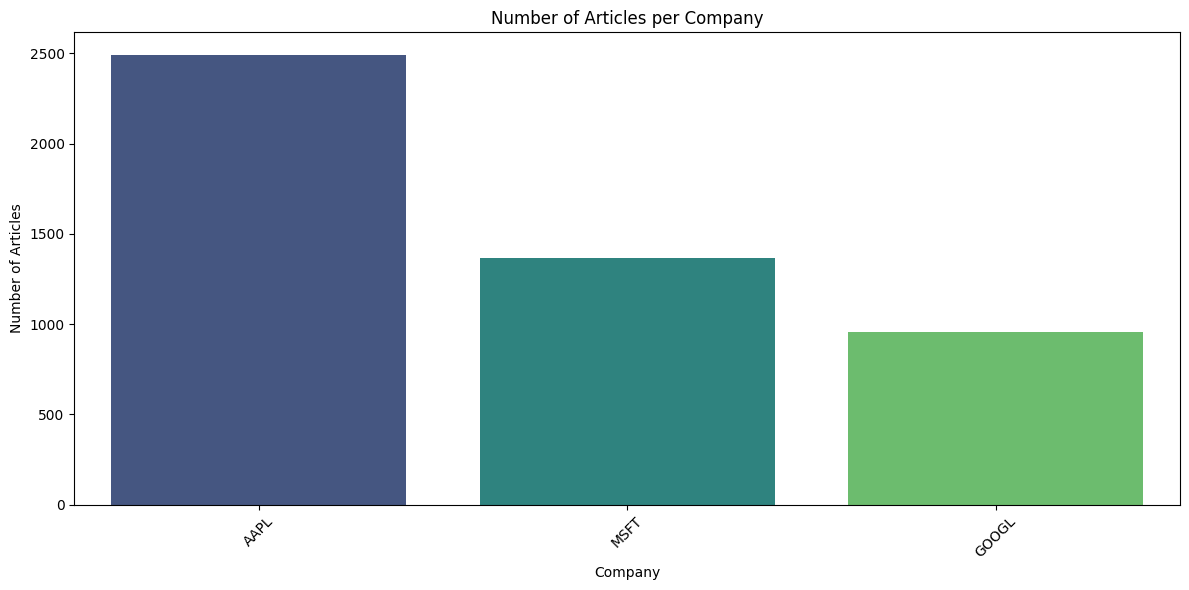

In [52]:
ask_openai_and_plot(instruction_2, dataset_input)